## Title :

Exercise: Bagging vs Random Forest (Tree correlation)

## Description :

- How does Random Forest improve on Bagging? 
    - The goal of this exercise is to investigate the correlation between randomly selected trees from Bagging and Random Forest. 
    
## Instructions:

- Read the dataset `diabetes.csv` as a pandas dataframe, and take a quick look at the data.
- Split the data into train and validation sets.
- Define a `BaggingClassifier` model that uses `DecisionTreClassifier` as its base estimator.
- Specify the number of bootstraps as 1000 and a maximum depth of 3.
- Fit the `BaggingClassifier` model on the train data.
- Use the helper code to predict using the mean model and individual estimators. The plot will look similar to the one given below.
- Predict on the test data using the first estimator and the mean model.
- Compute and display the validation accuracy
- Repeat the modeling and classification process above, this time using a `RandomForestClassifier`.
- Your final output will look something like this:

<img src="./fig/fig1.png" style="width: 1000px;">


## Hints: 

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a>
Split arrays or matrices into random train and test subsets.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html" target="_blank">sklearn.ensemble.BaggingClassifier()</a>
Returns a Bagging classifier instance.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">sklearn.tree.DecisionTreeClassifier()</a>
A Tree classifier can be used as the base model for the Bagging classifier.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank">sklearn.ensemble.andomForestClassifier()</a>
Defines a Random forest classifier.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html" target="_blank">sklearn.metrics.accuracy_score(y_true, y_pred)</a>
Accuracy classification score. 

In [26]:
#! pip install -qq dtreeviz
import os, sys
sys.path.append(f"{os.getcwd()}/../")

In [27]:
# Import the main packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
import dtreeviz

%matplotlib inline

colors = [None,  # 0 classes
        None,  # 1 class
        ['#FFF4E5','#D2E3EF'],# 2 classes
        ]

from IPython.display import Markdown, display
def printmd(string):
        display(Markdown(string))


In [28]:
# Read the dataset and take a quick look
df = pd.read_csv("./diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
### edTest(test_assign) ###
# Assign the predictor and response variables. 
# "Outcome" is the response and all the other columns are the predictors
X = df.drop(columns='Outcome')
y = df['Outcome']


In [30]:
# Fix a random_state
random_state = 42

# Split the data into train and validation sets with 80% train size
# and the above set random state
X_train, X_val, y_train,y_val = train_test_split(X, y, train_size=0.8, random_state=random_state)


## Bagging Implementation

In [31]:
# Define a Bagging classifier with randon_state as above
# and with a DecisionClassifier as a basemodel
# Fix the max_depth variable to 20 for all trees
max_depth = 20

# Set the 100 estimators
n_estimators = 100

# Initialize the Decision Tree classsifier with the set max depth and 
# random state
basemodel = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

# Initialize a Bagging classsifier with the Decision Tree as the base and 
# estimator and the number of estimator defined above
bagging = BaggingClassifier(estimator=basemodel, n_estimators=n_estimators)        

# Fit the Bagging model on the training set
bagging.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20,
                                                   random_state=42),
                  n_estimators=100)

In [32]:
### edTest(test_bagging) ###

# Use the trained model to predict on the validation data
predictions = bagging.predict(X_val)

# Compute the accuracy on the validation set
acc_bag = round(accuracy_score(predictions, y_val),2)

# Print the validation data accuracy
print(f'For Bagging, the accuracy on the validation set is {acc_bag:.1%}')


For Bagging, the accuracy on the validation set is 74.0%


## Random Forest implementation

In [33]:
# Define a Random Forest classifier with random_state as defined above
#  and set the maximum depth to be max_depth and use 100 estimators
random_forest = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=random_state)

# Fit the model on the training set
random_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

In [34]:
### edTest(test_RF) ###

# Use the trained Random Forest model to predict on the validation data
predictions = random_forest.predict(X_val)

# Compute the accuracy on the validation set
acc_rf = round(accuracy_score(predictions, y_val),2)

# Print the validation data accuracy
print(f'For Random Forest, the accuracy on the validation set is {acc_rf:.1%}')


For Random Forest, the accuracy on the validation set is 72.0%


## Visualizing the trees - Bagging

In [41]:
# Helper code to visualize the Bagging tree
# Reduce the max_depth for better visualization 
max_depth = 3

basemodel = DecisionTreeClassifier(max_depth=max_depth, 
                                random_state=random_state)

bagging = BaggingClassifier(estimator=basemodel, 
                                n_estimators=1000)

# Fit the model on the training set
bagging.fit(X_train, y_train)

# Selecting two trees at random
bagvati1 = bagging.estimators_[0]
bagvati2 = bagging.estimators_[100]


In [65]:
vizB = dtreeviz.model(bagvati2,
            X_train=X_train,
            y_train=y_train,
            feature_names=df.columns[:8],
            target_name='Diabetes',
            class_names=['No', 'Yes'],
            #orientation='TD',
            #colors={'classes': colors},
            #label_fontsize=14,
            #ticks_fontsize=10,
            #scale=1.1
            )
printmd('<center> <h2> <i> Bagging Tree 2 </h2> </center>')
sample_idx = 2
sample = X.iloc[sample_idx]
explication = vizB.explain_prediction_path(sample)  
print(explication)
#vizB.view()

<center> <h2> <i> Bagging Tree 2 </h2> </center>

165.5 <= Glucose 
Insulin < 611.5



/home/jm/.local/lib/python3.12/site-packages/dtreeviz/models/shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/home/jm/.local/lib/python3.12/site-packages/dtreeviz/interpretation.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


## Visualizing the trees - Random Forest

In [37]:
# Helper code to visualize the Random Forest tree

# Reduce the max_depth for visualization 
max_depth = 3
random_forest = RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=1000,max_features = "sqrt")

# Fit the model on the training set
random_forest.fit(X_train, y_train)

# Selecting two trees at random
forestvati1 = random_forest.estimators_[0]
forestvati2 = random_forest.estimators_[100]


<center> <h2> <i> Random Forest Tree 1 </h2> </center>

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

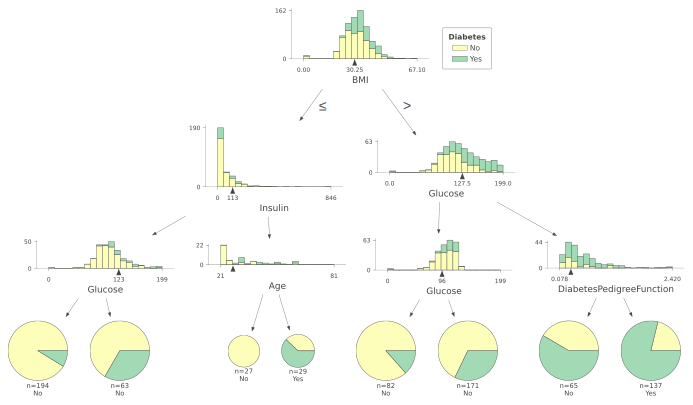

In [38]:
vizC = dtreeviz.model(forestvati1,
                df.iloc[:,:8],
                df.Outcome,
                feature_names = df.columns[:8],
                target_name = 'Diabetes', class_names= ['No','Yes'],
                #orientation = 'TD',
                #colors={'classes':colors},
                #label_fontsize=14,
                #ticks_fontsize=10,
                #scale=1.1
                )
printmd('<center> <h2> <i> Random Forest Tree 1 </h2> </center>')
vizC.view()

<center> <h2> <i> Random Forest Tree 2 </h2> </center>

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

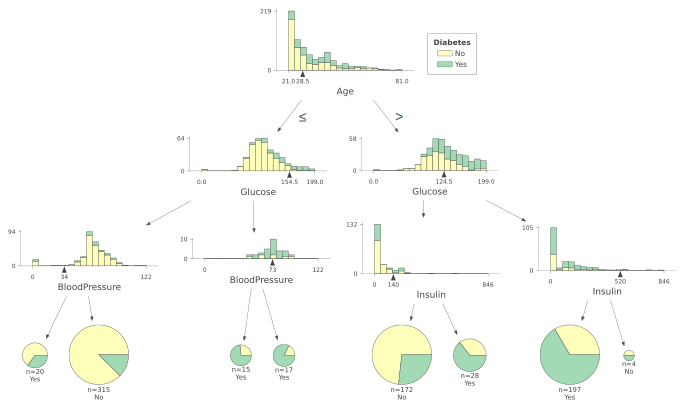

In [39]:
vizD = dtreeviz.model(
            forestvati2,
            df.iloc[:,:8],
            df.Outcome,
            feature_names = df.columns[:8],
            target_name = 'Diabetes', class_names= ['No','Yes'],
            #orientation = 'TD',
            #colors={'classes':colors},
            #label_fontsize=14,
            #ticks_fontsize=10,
            #scale=1.1
            )
printmd('<center> <h2> <i> Random Forest Tree 2 </h2> </center>')
vizD.view()